**Adding one more Hidden layer to Autoencoder**

In [7]:
from keras.layers import Input, Dense
from keras.models import Model

# This is the size of our encoded representation
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded1 = Dense(128, activation='relu')(input_img)
encoded2 = Dense(encoding_dim, activation='relu')(encoded1)

# "decoded" is the lossy reconstruction of the input
decoded1 = Dense(128, activation='relu')(encoded2)
decoded2 = Dense(784, activation='sigmoid')(decoded1)

# This model maps an input to its reconstruction
autoencoder = Model(input_img, decoded2)

# This model maps an input to its encoded representation
encoder = Model(input_img, encoded2)

# This is our decoder model
encoded_input = Input(shape=(encoding_dim,))
decoder_layer1 = autoencoder.layers[-2]
decoder_layer2 = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer2(decoder_layer1(encoded_input)))

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics ='accuracy')

# Load the MNIST dataset
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize and flatten the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Train the autoencoder
history =autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/5
235/235 [==============================] - 5s 17ms/step - loss: 0.3692 - accuracy: 0.0089 - val_loss: 0.3137 - val_accuracy: 0.0139
Epoch 2/5
235/235 [==============================] - 4s 16ms/step - loss: 0.3039 - accuracy: 0.0153 - val_loss: 0.3007 - val_accuracy: 0.0168
Epoch 3/5
235/235 [==============================] - 5s 22ms/step - loss: 0.2954 - accuracy: 0.0171 - val_loss: 0.2945 - val_accuracy: 0.0172
Epoch 4/5
235/235 [==============================] - 4s 16ms/step - loss: 0.2905 - accuracy: 0.0184 - val_loss: 0.2910 - val_accuracy: 0.0185
Epoch 5/5
235/235 [==============================] - 4s 16ms/step - loss: 0.2875 - accuracy: 0.0203 - val_loss: 0.2891 - val_accuracy: 0.0210


313/313 [==============================] - 1s 2ms/step


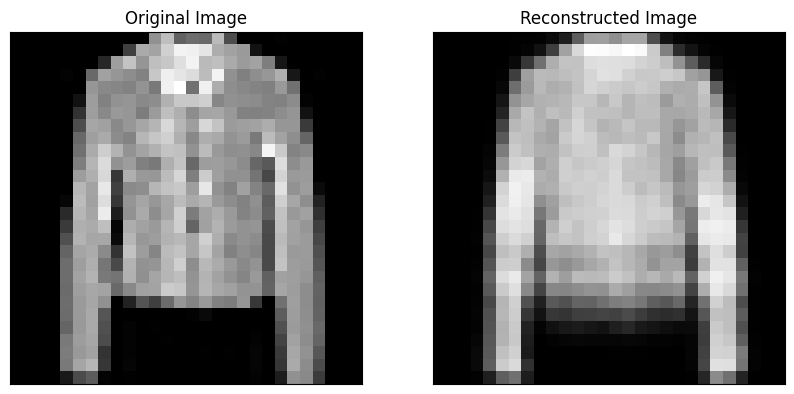

In [10]:
import matplotlib.pyplot as plt

# Get the reconstructed images for the test set
reconstructed_imgs = autoencoder.predict(x_test)

# Choose a random image from the test set
n = 10  # index of the image to be plotted
plt.figure(figsize=(10, 5))

# Plot the original image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test[n].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title("Original Image")

# Plot the reconstructed image
ax = plt.subplot(1, 2, 2)
plt.imshow(reconstructed_imgs[n].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title("Reconstructed Image")

plt.show()


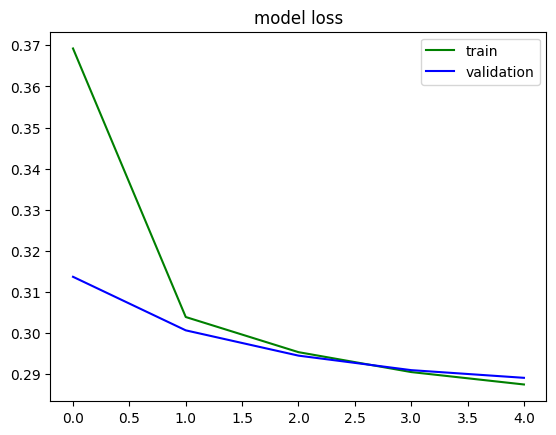

In [9]:
# graph
plt.plot(history.history['loss'], color="green")
plt.plot(history.history['val_loss'], color="blue")
plt.title('model loss')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


In [12]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics ='accuracy')
from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

Epoch 1/10
235/235 [==============================] - 3s 12ms/step - loss: 0.4229 - accuracy: 0.0076 - val_loss: 0.3423 - val_accuracy: 0.0062
Epoch 2/10
235/235 [==============================] - 3s 11ms/step - loss: 0.3393 - accuracy: 0.0104 - val_loss: 0.3133 - val_accuracy: 0.0080
Epoch 3/10
235/235 [==============================] - 3s 11ms/step - loss: 0.3234 - accuracy: 0.0114 - val_loss: 0.2978 - val_accuracy: 0.0078
Epoch 4/10
235/235 [==============================] - 4s 15ms/step - loss: 0.3151 - accuracy: 0.0121 - val_loss: 0.2878 - val_accuracy: 0.0094
Epoch 5/10
235/235 [==============================] - 3s 11ms/step - loss: 0.3100 - accuracy: 0.0123 - val_loss: 0.2806 - val_accuracy: 0.0081
Epoch 6/10
235/235 [==============================] - 2s 11ms/step - loss: 0.3067 - accuracy: 0.0136 - val_loss: 0.2758 - val_accuracy: 0.0089
Epoch 7/10
235/235 [==============================] - 3s 11ms/step - loss: 0.3045 - accuracy: 0.0132 - val_loss: 0.2721 - val_accuracy: 0.0096

313/313 [==============================] - 1s 2ms/step


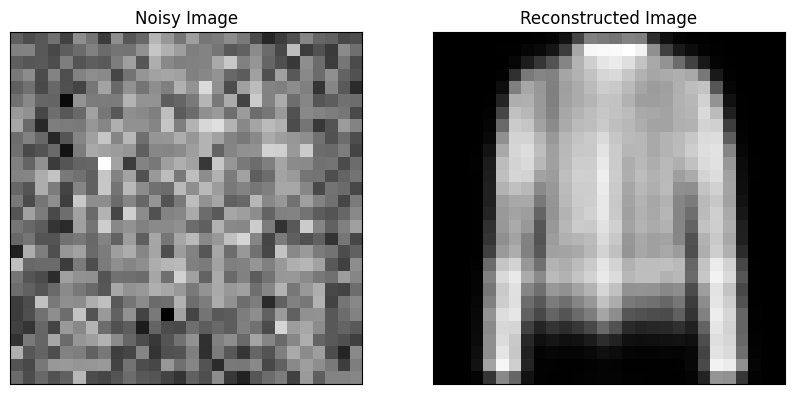

In [5]:
import matplotlib.pyplot as plt

# Get the reconstructed images for the test set
reconstructed_imgs = autoencoder.predict(x_test_noisy)

# Choose a random image from the test set
n = 10  # index of the image to be plotted
plt.figure(figsize=(10, 5))

# Plot the original noisy image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test_noisy[n].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title("Noisy Image")

# Plot the reconstructed image
ax = plt.subplot(1, 2, 2)
plt.imshow(reconstructed_imgs[n].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title("Reconstructed Image")

plt.show()

Epoch 1/10
235/235 [==============================] - 3s 13ms/step - loss: 0.3005 - accuracy: 0.0159 - val_loss: 0.2649 - val_accuracy: 0.0096
Epoch 2/10
235/235 [==============================] - 3s 11ms/step - loss: 0.3001 - accuracy: 0.0159 - val_loss: 0.2638 - val_accuracy: 0.0097
Epoch 3/10
235/235 [==============================] - 3s 11ms/step - loss: 0.2998 - accuracy: 0.0160 - val_loss: 0.2631 - val_accuracy: 0.0100
Epoch 4/10
235/235 [==============================] - 3s 11ms/step - loss: 0.2995 - accuracy: 0.0164 - val_loss: 0.2623 - val_accuracy: 0.0098
Epoch 5/10
235/235 [==============================] - 4s 15ms/step - loss: 0.2993 - accuracy: 0.0162 - val_loss: 0.2618 - val_accuracy: 0.0100
Epoch 6/10
235/235 [==============================] - 3s 11ms/step - loss: 0.2991 - accuracy: 0.0164 - val_loss: 0.2613 - val_accuracy: 0.0100
Epoch 7/10
235/235 [==============================] - 3s 11ms/step - loss: 0.2990 - accuracy: 0.0166 - val_loss: 0.2609 - val_accuracy: 0.0112

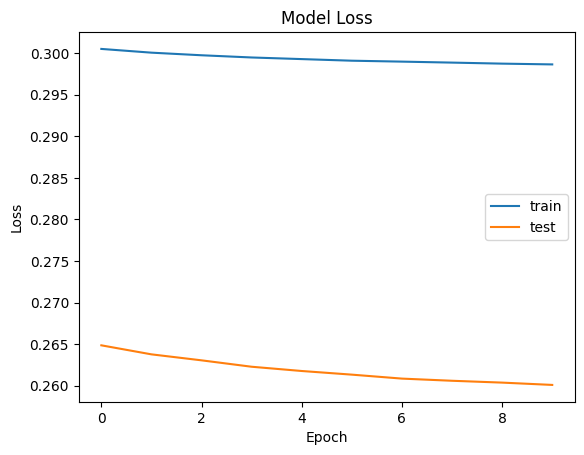

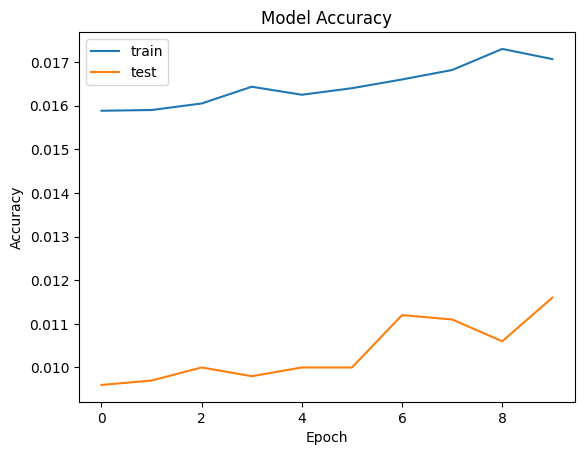

In [13]:
import matplotlib.pyplot as plt

# Train the autoencoder
history = autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

# Plot the loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot the accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()